In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import struct

# EMNIST Dataset
This data set consists of digits and letters. Full description of this data can be found in this [paper](https://arxiv.org/abs/1702.05373v1). There are labelled 28 pixel by 28 pixel images. They are labelled by numbers and alphabets. There are different versions of data. We will be using the `byMerge` set, which has 37 symbols - 10 digits, 26 letters, and space.
The full data set can be downloaded from [here](https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip). However, we found the link to be unreliable in practice. You can find  a version of the data downloaded already in the `./data` directory.

In [30]:
# Read the images from the data format
with open('data/emnist-bymerge-test-images-idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    ncols, nrows = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size, ncols, nrows))


print("Test set size:", size)
print(data.shape)

Test set size: 116323
(116323, 28, 28)


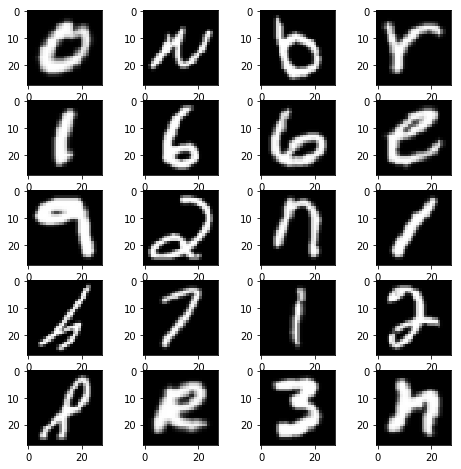

In [35]:
# Now, lets try and generate some sample images to see what the data looks like
fig=plt.figure(figsize=(8, 8))  # show 8in X 8in image
columns = 4  # 4 images per row
rows = 5  # lay out images on 5 rows
for i in range(1, columns*rows +1):
    img_id = np.random.randint(0, 116322)  # max number of images, from prev section
    fig.add_subplot(rows, columns, i)
    img_data = data[img_id,:,:]
    flipped = np.fliplr(img_data)  # images are horiontally flipped and 
    img_data = np.rot90(flipped)   # rotated 90 degrees
    plt.imshow(img_data, cmap='gray')
plt.show()

In [20]:
with open('data/emnist-bymerge-train-images-idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size, nrows, ncols))


print("Training set size:", size)
print(data.shape)

Training set size: 697932
(697932, 28, 28)
